In [ ]:
!unzip "/content/drive/MyDrive/hac_h/Participants_data_DSSC_SZ.zip"
#unzipping the data

In [ ]:
#loading the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,16)})
from math import sqrt
from lightgbm import LGBMRegressor
import xgboost as xgb


In [ ]:
#reading the dataset
train= pd.read_csv("/content/drive/MyDrive/hac_h/train.csv")
test=pd.read_csv("/content/drive/MyDrive/hac_h/test.csv")
sub=pd.read_csv("/content/drive/MyDrive/hac_h/submission.csv")

In [ ]:
train.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0


In [ ]:
train.describe()

,Property_ID,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
count,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,1.346830e+05,134683.000000,134683.000000,134683.000000
mean,96036.100777,2.029677,36690.033894,1480.388490,2.040488,0.534388,9.163087,0.527602,0.337051,0.472561,0.692626,0.440137,2.202480e+05,0.561838,0.595851,2033.024212
std,55565.228125,0.937308,62620.364025,1412.464718,0.867065,0.498818,5.957549,0.499239,0.472704,0.499248,0.461407,0.496405,4.204503e+05,0.496163,0.490728,1159.635981
min,2.000000,1.000000,1583.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.180000e+03,0.000000,0.000000,0.000000
25%,47940.000000,1.000000,12035.500000,759.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.580250e+04,0.000000,0.000000,1100.000000
50%,95950.000000,2.000000,20856.000000,1114.000000,2.000000,1.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.142640e+05,1.000000,1.000000,2000.000000
75%,144194.500000,3.000000,36014.000000,1580.000000,2.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.207045e+05,1.000000,1.000000,3000.000000
max,192405.000000,5.000000,799325.000000,13942.000000,5.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.940780e+06,1.000000,1.000000,4000.000000


Property_ID', = Unique id of the property 

'room',  No. of rooms available

'layout_type', ['BHK' 'RK']

'property_type', = ['Apartment' 'Studio Apartment' 'Independent Floor' 'Independent House' 'Villa' 'Penthouse']

'locality',  = Overall Locality description

'price', = Rent in INR

'area', = in Square Feet

'furnish_type', ['Semi-Furnished' 'Furnished' 'Unfurnished']

'bathroom',: No. of Bathrooms


'city', : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune']

'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No

'floor',: Floor from 0 to 20

'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No

'power_backup', : 1 or 0  : 1 = Yes, 0 = No

'washing_machine',: 1 or 0  : 1 = Yes, 0 = No

'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No

'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No

'security_deposit', Amount of security 
Deposit

'neighborhood', : Nearest Metro/Bus/Mall in meters

'CCTV/security' : CCTV available 1 or 0  : 1 = Yes, 0 = No

'lift': 1 or 0  : 1 = Yes, 0 =

# eda(Exploratory data analysis)


In [ ]:
86819/134683

0.6446173607656497

Mumbai       46910
Delhi        22826
Bangalore    16092
Pune         15713
Ahmedabad    12976
Hyderabad     7334
Kolkata       6795
Chennai       6037
Name: city, dtype: int64 



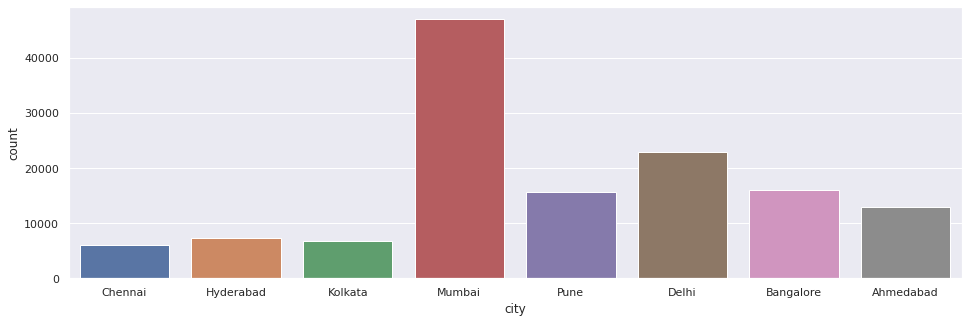

In [ ]:
print(train["city"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["city"])
plt.show()


BHK    114684
RK      19999
Name: layout_type, dtype: int64 



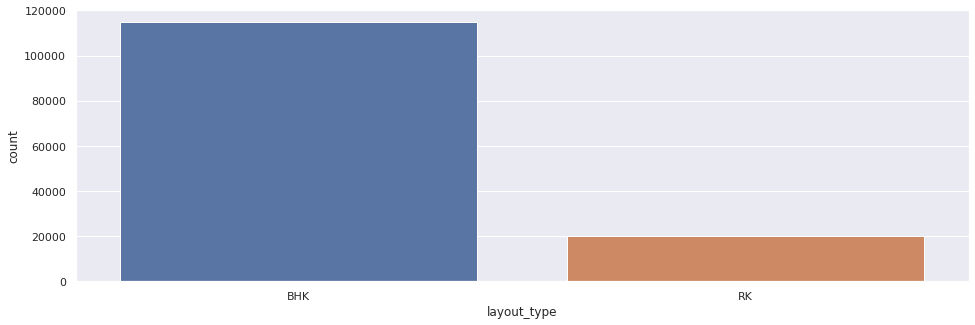

In [ ]:
print(train["layout_type"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["layout_type"])
plt.show()


Apartment            86819
Independent Floor    25850
Independent House    13408
Studio Apartment      5723
Villa                 2391
Penthouse              492
Name: property_type, dtype: int64 



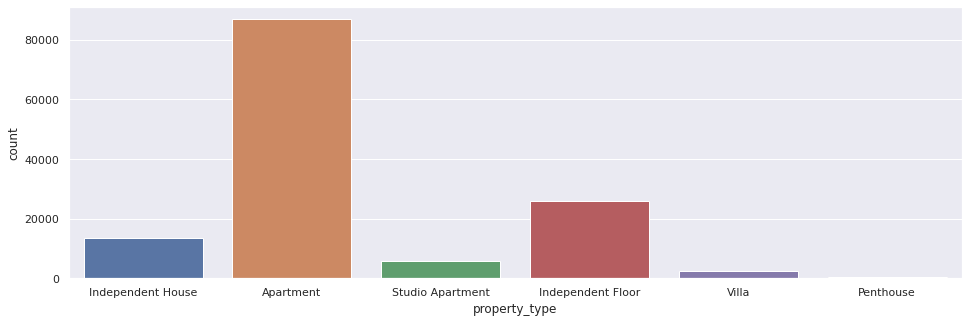

In [ ]:
#property_type
print(train["property_type"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["property_type"])
plt.show()

#using this code we can check all the categorical columns

In [ ]:
train['price'].describe()

count    134683.000000
mean      36690.033894
std       62620.364025
min        1583.000000
25%       12035.500000
50%       20856.000000
75%       36014.000000
max      799325.000000
Name: price, dtype: float64

95810 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


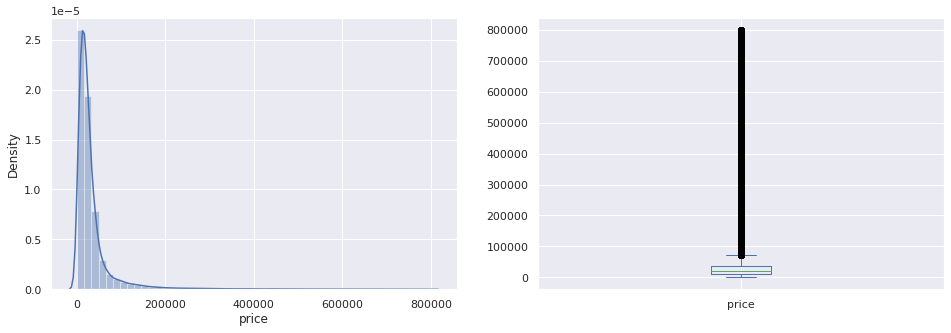

In [ ]:
#continous variables

print(train.security_deposit.nunique(),"\n")
plt.subplot(121)
sns.distplot(train['price'],color="b");

plt.subplot(122)
train['price'].plot.box(figsize=(16,5))

plt.show()
#skewed 
#we can also look into other continous variables

95810 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


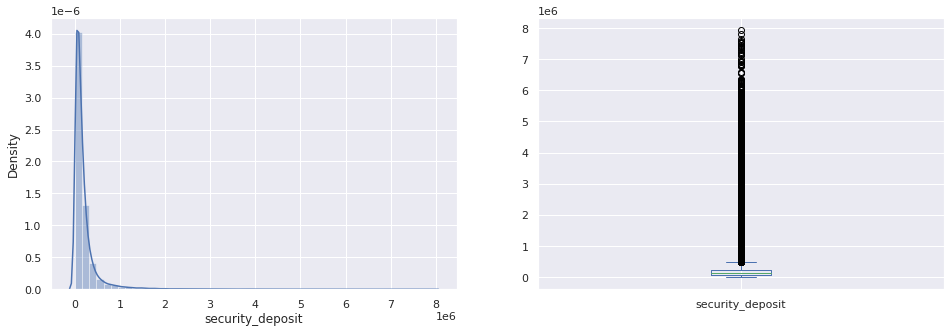

In [ ]:
#continous variables

print(train.security_deposit.nunique(),"\n")
plt.subplot(121)
sns.distplot(train['security_deposit'],color="b");

plt.subplot(122)
train['security_deposit'].plot.box(figsize=(16,5))

plt.show()
#skewed 
#we can also look into other continous variables

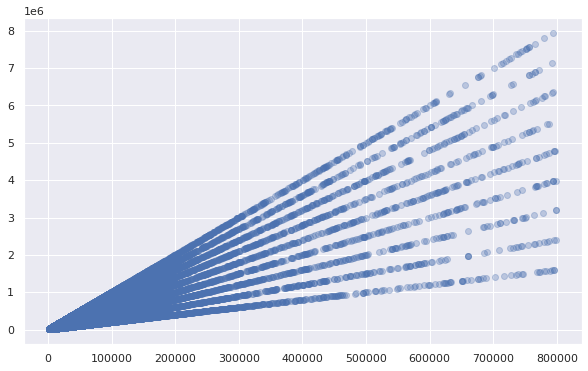

In [ ]:
# important insight 
#price vs security_deposit
plt.figure(figsize=(10,6))
plt.scatter(y=train['security_deposit'],x=train['price'],alpha=0.3)

In [ ]:
#check the above plot carefully we can we some type of liner relation but in different scale ,
#the differnt liner liner

# group_by

In [ ]:
k=train.groupby(['city','locality'])['price'].agg(['count'])
k.reset_index(inplace=True)
k=k.sort_values(by=['count'],ascending=False)
k=k.reset_index(drop=True)
k

,city,locality,count
0,Mumbai,Thane West,3127
1,Mumbai,Chembur,2461
2,Mumbai,Andheri East,2377
3,Ahmedabad,Bopal,2054
4,Mumbai,Kharghar,1819
...,...,...,...
3754,Hyderabad,Bachupally Road,1
3755,Hyderabad,Babamma Colony,1
3756,Hyderabad,BK Guda Road,1
3757,Hyderabad,BHEL OLD MIG,1


In [ ]:
k.loc[k.groupby(['city'])['count'].idxmax()]

,city,locality,count
3,Ahmedabad,Bopal,2054
22,Bangalore,HSR Layout,866
80,Chennai,Velachery,352
8,Delhi,Saket,1533
18,Hyderabad,Kondapur,945
11,Kolkata,New Town,1326
0,Mumbai,Thane West,3127
10,Pune,Wagholi,1498


In [ ]:
k=train.groupby(['city','property_type'])['price'].agg(['median','count','mean'])
k.reset_index(inplace=True)
k=k.sort_values(by=['count'],ascending=False)
k

,city,property_type,median,count,mean
36,Mumbai,Apartment,20353.0,29793,35889.499715
18,Delhi,Apartment,21330.0,14677,36718.516250
6,Bangalore,Apartment,24024.0,10757,39559.356512
42,Pune,Apartment,18419.0,9723,33358.033426
37,Mumbai,Independent Floor,18797.5,9090,34638.756876
0,Ahmedabad,Apartment,25600.0,8844,42120.524197
38,Mumbai,Independent House,18632.0,4704,34295.493197
24,Hyderabad,Apartment,20613.0,4666,36954.771539
19,Delhi,Independent Floor,20320.0,4367,37340.868331
30,Kolkata,Apartment,20840.0,4335,37278.390773


# data preparation

In [ ]:
#converting all the categorical values into numberical values
#for that we can combine both test and train dataset together
#we also need seprate both train and test we needed
#so in test['price']=999

test['price']=-999
#we are concatenating both test and train

df=pd.concat([train,test],axis=0)
df.head()


,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,int
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,0,0,1,0,302616,0,0,300,2
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,0,1,0,0,1,19310,0,1,1600,2
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,1,1,1,1,0,118495,0,1,3100,2
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,0,0,0,0,0,37836,0,1,300,2
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,0,0,1,1,0,72048,0,1,0,2


In [ ]:
df.tail()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,se_pr,int
57717,132027,3,BHK,Apartment,Dadar West,-999,1628,Semi-Furnished,2,Mumbai,...,0,1,1,0,77049,0,0,2900,NaN,2
57718,86405,1,BHK,Apartment,Kondapur,-999,729,Unfurnished,1,Hyderabad,...,0,0,0,0,29074,1,0,3100,NaN,2
57719,16233,3,RK,Independent Floor,Chandkheda,-999,897,Furnished,3,Ahmedabad,...,1,0,1,1,188088,1,1,1100,NaN,2
57720,63020,3,BHK,Independent Floor,Uttam Nagar,-999,2229,Unfurnished,1,Delhi,...,1,0,0,0,103938,0,0,1500,NaN,2
57721,62907,2,BHK,Apartment,Vivek Vihar,-999,839,Semi-Furnished,3,Delhi,...,0,1,1,1,84788,1,1,300,NaN,2


In [ ]:
df.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],
      dtype='object')

In [ ]:
df["layout_type"].replace(["BHK","RK"],[1,0],inplace=True)
df['furnish_type'].replace(['Furnished','Semi-Furnished','Unfurnished'],[2,1,0],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["city"]= label_encoder.fit_transform(df["city"])

In [ ]:
label_encoder = LabelEncoder()
df["property_type"]= label_encoder.fit_transform(df["property_type"])

In [ ]:
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,int
0,42208,3,1,2,Palavakkam,33624,1312,2,2,2,...,1,0,0,1,0,302616,0,0,300,2
1,90879,1,1,0,Manikonda,9655,1474,0,2,4,...,0,1,0,0,1,19310,0,1,1600,2
2,99943,3,1,0,Jodhpur Park,23699,1837,1,2,5,...,1,1,1,1,0,118495,0,1,3100,2
3,113926,1,1,0,Chembur,6306,606,0,1,6,...,0,0,0,0,0,37836,0,1,300,2
4,185438,1,1,4,Kalewadi Pandhapur Road,12008,498,1,3,7,...,0,0,1,1,0,72048,0,1,0,2


# feature_engneering (adding new features)

In [ ]:
#only for checking the data
train['se_pr']=(train.security_deposit)/train.price

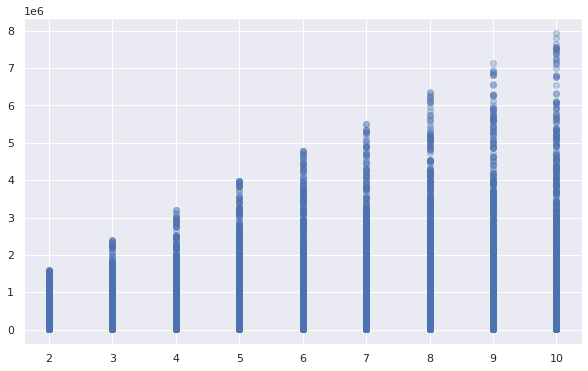

In [ ]:
#very important plot

plt.figure(figsize=(10,6))
plt.scatter(y=train['security_deposit'],x=train['se_pr'],alpha=0.3)

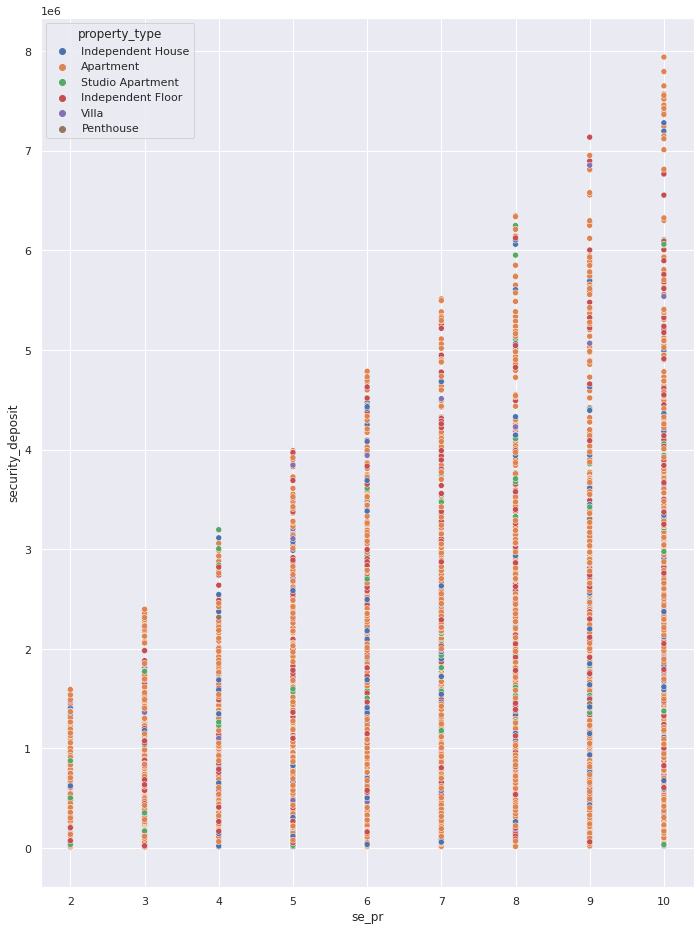

In [ ]:
sns.set(rc={'figure.figsize':(11.7,16)})
sns.scatterplot(data=train, x="se_pr", y="security_deposit", hue="property_type")

4.0     15137
9.0     15083
3.0     14982
5.0     14969
8.0     14966
7.0     14962
6.0     14886
2.0     14876
10.0    14822
Name: se_pr, dtype: int64 



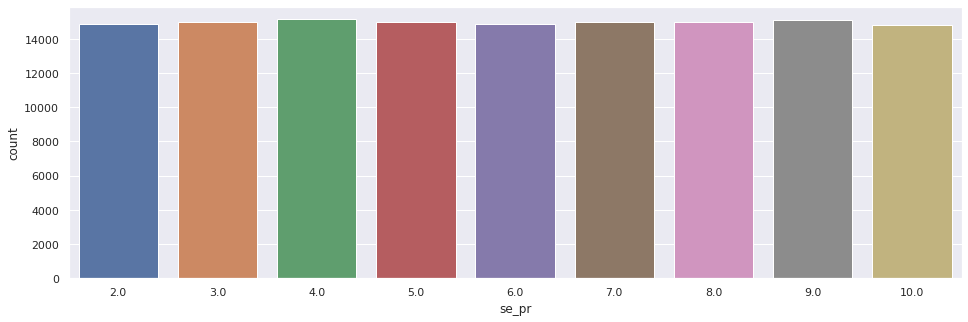

In [ ]:
print(train["se_pr"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["se_pr"])
plt.show()

**adding new columns**

In [ ]:
f1=1.592856e+06
f2=2.397975e+06
f3=3.196492e+06
f4=3.990410e+06
f5=4.787202e+06
f6=5.513718e+06
f7=6.348368e+06
f8=7.136649e+06
f9=7.940780e+06

#the above values are found by proper analysis of data

In [ ]:
#helper function for new column int 
def my(h):
  b=[]
  for x in h:

   if x<=f1:
      b.append(2)

   elif x<=f2:
       b.append(3)

   elif x<=f3:
        b.append(4)

   elif x<=f4:
        b.append(5)

   elif x<=f5:
        b.append(6)
  
   elif x<=f6:
        b.append(7)
   elif x<=f7:
        b.append(8)

   elif x<=f8:
        b.append(9)

   elif x<=f9:
        b.append(10)
  return b

In [ ]:
f1

1592856.0

90% of the data have security deposit below 1592856

In [ ]:
df['int']=my(df.security_deposit)

In [ ]:
test['int']=my(test['security_deposit'])
train['int']=my(train['security_deposit'])

In [ ]:
#creating two columns
large=df.copy()
large['luxary_scale']=large.power_backup+large.washing_machine+large.air_conditioner+large['geyser/solar']+large['CCTV/security']+large.lift+large.furnish_type
large['t_room']=large.room+large.bathroom

5    50995
4    37801
6    31475
2    22272
3    21501
1    16553
7     7413
0     4395
Name: luxary_scale, dtype: int64 



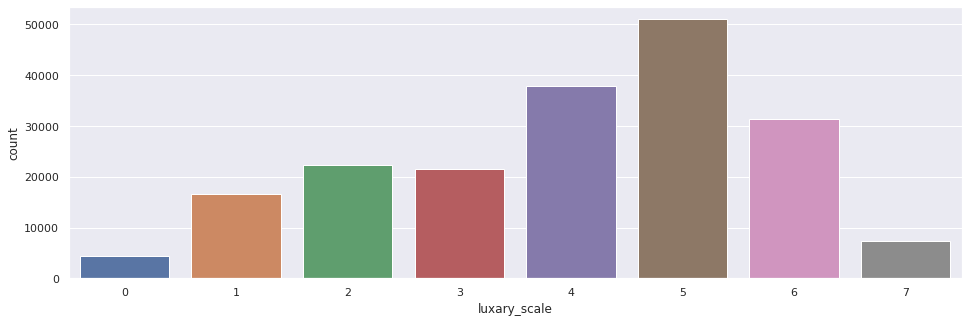

In [ ]:
print(large["luxary_scale"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = large["luxary_scale"])
plt.show()

In [ ]:
df=large.copy()

In [ ]:
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,int,luxary_scale,t_room
0,42208,3,1,2,Palavakkam,33624,1312,2,2,2,...,0,1,0,302616,0,0,300,2,3,5
1,90879,1,1,0,Manikonda,9655,1474,0,2,4,...,0,0,1,19310,0,1,1600,2,3,3
2,99943,3,1,0,Jodhpur Park,23699,1837,1,2,5,...,1,1,0,118495,0,1,3100,2,5,5
3,113926,1,1,0,Chembur,6306,606,0,1,6,...,0,0,0,37836,0,1,300,2,1,2
4,185438,1,1,4,Kalewadi Pandhapur Road,12008,498,1,3,7,...,1,1,0,72048,0,1,0,2,4,4


# Model

In [ ]:
#now partially our dataprepration is done 
# now we can split the datainto train and test set
td=df[df.price>0] #train
ts=df[df.price<0] #test

In [ ]:
ts=ts.reset_index(drop=True)
td=td.reset_index(drop=True)

In [ ]:
ts.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,int,luxary_scale,t_room
0,114342,2,1,1,Palava,-999,1347,1,1,6,...,1,1,0,72624,1,0,900,2,5,3
1,88819,1,1,2,Somajiguda,-999,634,1,3,4,...,1,1,0,19656,0,0,2500,2,3,4
2,85623,1,1,0,Toli Chowki,-999,524,0,1,4,...,0,0,0,7500,0,0,3200,2,1,2
3,130856,3,1,0,Thane West,-999,1837,0,5,6,...,0,0,1,137646,1,1,1200,2,3,8
4,40089,2,1,0,Krishnarajapura,-999,1208,1,2,1,...,1,1,0,110898,0,1,1000,2,5,4


In [ ]:
no_need=["kfold",'Property_ID','price','se_pr','locality']
u_ff1=[c for c in td.columns if c not in no_need]
#selecting only the needed column for training

In [ ]:
u_ff1

['room',
 'layout_type',
 'property_type',
 'area',
 'furnish_type',
 'bathroom',
 'city',
 'parking_spaces',
 'floor',
 'pet_friendly',
 'power_backup',
 'washing_machine',
 'air_conditioner',
 'geyser/solar',
 'security_deposit',
 'CCTV/security',
 'lift',
 'neighbourhood',
 'int',
 'luxary_scale',
 't_room']

In [ ]:
jkl=pd.DataFrame()
from sklearn.metrics import mean_squared_error
from math import sqrt
from lightgbm import LGBMRegressor
from scipy import stats

In [ ]:
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(td[u_ff1], td['price'], test_size = 0.2, random_state = 42)

In [ ]:
#simple and basic model
# i tried parameter tuning with optuna but it was 0verfitting
model =xgb.XGBRegressor(random_state=42)
model.fit(td[u_ff1],td['price'],early_stopping_rounds=200,eval_set=[(X_test_r, y_test_r)],verbose=False)

[13:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
valid_pred = model.predict(X_test_r)

rmse=mean_squared_error(y_test_r,valid_pred,squared=False)

rmse

25961.448820186684

In [ ]:
#prediction the rent price for the test set with the trained model
z=model.predict(ts[u_ff1])

In [ ]:
z

array([18365.297 ,  6439.278 ,  3411.6536, ..., 32039.875 , 20199.9   ,
       19080.584 ], dtype=float32)

In [ ]:
sub['price']=z

In [ ]:
sub.head()

,price
0,18365.296875
1,6439.277832
2,3411.653564
3,25478.445312
4,23498.595703


In [ ]:
#sub.to_csv("f.csv",index=False)

**this above predicted value gives you a rmse score 26813 which very good comparing to other tuned models.so i decided to take this model as my final model**

# adjusting the predicted price according to the security_deposit column and other columns

In [ ]:
f8

7136649.0

In [ ]:
#this is based on observations seen  in the dataset during eda




*   as we the minimum value of se_pr(deposit/price) is 2 [ratio between rent and security_deposit]
*   max value of se_pr is 10
* so we are 100% sure the price and deposit relation will be from 2,3..10
* so we can adjust the predicted values accordingly.
* and rent price for security_deposit > 7136649 is always security_deposit/10



**phase one** 

In [ ]:
#create a new column pro=securitdeposit/price for sub dataframe ie 

In [ ]:
#adding the test deposit column into sub 
sub['security_deposit']=test.security_deposit
sub['Property_ID']=test.Property_ID
sub['int']=test.int
#new col
sub['pro']=(sub.security_deposit)/sub.price

In [ ]:
sub.head()

,price,security_deposit,Property_ID,int,pro
0,18365.296875,72624,114342,2,3.954415
1,6439.277832,19656,88819,2,3.052516
2,3411.653564,7500,85623,2,2.198347
3,25478.445312,137646,130856,2,5.402449
4,23498.595703,110898,40089,2,4.719346


In [ ]:
sub[sub.pro<2.1]

,price,security_deposit,Property_ID,int,pro
210,6358.659668,12262,84844,2,1.928394
223,3362.253662,5949,169336,2,1.769349
237,4060.271973,6102,51457,2,1.502855
286,3965.035645,4888,185759,2,1.232776
342,6104.343262,8234,133976,2,1.348876
...,...,...,...,...,...
56676,5923.628906,11798,136415,2,1.991685
56703,3589.760498,7149,124025,2,1.991498
57001,5723.164551,7812,129170,2,1.364979
57252,6231.812988,12981,131676,2,2.083021


In [ ]:
# the ration for this 765 rows is less than 2,but the minimum ratio between rent and deposit is 2
#so we update the rent price of only thie 765 rows into deposit/2

#first update rent column

sub['new_price']=np.where(sub.pro<2.1,(sub.security_deposit)/2,sub.price)

#the where function in np is a simple if else functio.

In [ ]:
sub[sub.pro<2.1]
#now we got whole numbers
#but there are are some prices with reminder
#from the train data we are 100% sure that the rent of house will not be a float number.

#so the reminder gives as the hint that the price is not correct or the relation between price and deposit is more than 2 or we go with 3 

,price,security_deposit,Property_ID,int,pro,new_price
210,6358.659668,12262,84844,2,1.928394,6131.0
223,3362.253662,5949,169336,2,1.769349,2974.5
237,4060.271973,6102,51457,2,1.502855,3051.0
286,3965.035645,4888,185759,2,1.232776,2444.0
342,6104.343262,8234,133976,2,1.348876,4117.0
...,...,...,...,...,...,...
56676,5923.628906,11798,136415,2,1.991685,5899.0
56703,3589.760498,7149,124025,2,1.991498,3574.5
57001,5723.164551,7812,129170,2,1.364979,3906.0
57252,6231.812988,12981,131676,2,2.083021,6490.5


In [ ]:
sub['rem']=sub.new_price%1

In [ ]:
sub[sub.pro<2.1]

,price,security_deposit,Property_ID,int,pro,new_price,rem
210,6358.659668,12262,84844,2,1.928394,6131.0,0.0
223,3362.253662,5949,169336,2,1.769349,2974.5,0.5
237,4060.271973,6102,51457,2,1.502855,3051.0,0.0
286,3965.035645,4888,185759,2,1.232776,2444.0,0.0
342,6104.343262,8234,133976,2,1.348876,4117.0,0.0
...,...,...,...,...,...,...,...
56676,5923.628906,11798,136415,2,1.991685,5899.0,0.0
56703,3589.760498,7149,124025,2,1.991498,3574.5,0.5
57001,5723.164551,7812,129170,2,1.364979,3906.0,0.0
57252,6231.812988,12981,131676,2,2.083021,6490.5,0.5


In [ ]:
#we are adjusting again the price for the rows with column rem >0 deposit/3
#
sub['nnn']=np.where((sub.pro<2.1)&(sub.rem>0),(sub.security_deposit)/3,sub.new_price)


In [ ]:
sub[sub.pro<2.1]

,price,security_deposit,Property_ID,int,pro,new_price,rem,nnn
210,6358.659668,12262,84844,2,1.928394,6131.0,0.0,6131.0
223,3362.253662,5949,169336,2,1.769349,2974.5,0.5,1983.0
237,4060.271973,6102,51457,2,1.502855,3051.0,0.0,3051.0
286,3965.035645,4888,185759,2,1.232776,2444.0,0.0,2444.0
342,6104.343262,8234,133976,2,1.348876,4117.0,0.0,4117.0
...,...,...,...,...,...,...,...,...
56676,5923.628906,11798,136415,2,1.991685,5899.0,0.0,5899.0
56703,3589.760498,7149,124025,2,1.991498,3574.5,0.5,2383.0
57001,5723.164551,7812,129170,2,1.364979,3906.0,0.0,3906.0
57252,6231.812988,12981,131676,2,2.083021,6490.5,0.5,4327.0


**the column "nnn" has the updated price value*

**phase2**

In [ ]:
f8

7136649.0

In [ ]:
#as the minimum ration beween rent and deposit is 2

#the max ratio is 10

#and the rent for security_deposit >7136649 will be security_deposit/10  (from the plot)

In [ ]:
#reading the sub file again
s1=pd.read_csv("/content/drive/MyDrive/hac_h/submission.csv")
s1['price']=sub.nnn #updated price column
s1['security_deposit']=test.security_deposit
s1['Property_ID']=test.Property_ID
s1['int']=test.int
s1['pro']=(sub.security_deposit)/sub.price


In [ ]:
s1.head()

,price,security_deposit,Property_ID,int,pro
0,18365.296875,72624,114342,2,3.954415
1,6439.277832,19656,88819,2,3.052516
2,3411.653564,7500,85623,2,2.198347
3,25478.445312,137646,130856,2,5.402449
4,23498.595703,110898,40089,2,4.719346


In [ ]:
s1[s1.pro>10]
# we will update the price by deposit/10

,price,security_deposit,Property_ID,int,pro
6122,761874.0000,7847600,80750,10,10.300391
8589,734368.0000,7454630,1629,10,10.151082
11217,742219.6875,7543870,82048,10,10.163931
17665,734206.2500,7424980,50136,10,10.112935
35238,723068.8125,7271600,9148,10,10.056581
38884,733839.7500,7693290,9164,10,10.483610
40277,710602.7500,7294980,14284,10,10.265905
49231,744953.0625,7718600,191896,10,10.361190


In [ ]:
#train[train.security_deposit>f8]

In [ ]:
f8

7136649.0

In [ ]:
s1[s1.security_deposit>f8]
# for rows with security_deposit>f8 the ratio is 100%  10

,price,security_deposit,Property_ID,int,pro
410,766155.7500,7656450,170208,10,9.993334
6122,761874.0000,7847600,80750,10,10.300391
8589,734368.0000,7454630,1629,10,10.151082
11217,742219.6875,7543870,82048,10,10.163931
17665,734206.2500,7424980,50136,10,10.112935
27117,768496.5625,7142300,84627,10,9.293861
35238,723068.8125,7271600,9148,10,10.056581
38884,733839.7500,7693290,9164,10,10.483610
40277,710602.7500,7294980,14284,10,10.265905
49231,744953.0625,7718600,191896,10,10.361190


In [ ]:
#update the price
s1['new_p']=np.where(s1.security_deposit>f8,(s1.security_deposit)/10,s1.price)
s1[s1.security_deposit>f8]

,price,security_deposit,Property_ID,int,pro,new_p
410,766155.7500,7656450,170208,10,9.993334,765645.0
6122,761874.0000,7847600,80750,10,10.300391,784760.0
8589,734368.0000,7454630,1629,10,10.151082,745463.0
11217,742219.6875,7543870,82048,10,10.163931,754387.0
17665,734206.2500,7424980,50136,10,10.112935,742498.0
27117,768496.5625,7142300,84627,10,9.293861,714230.0
35238,723068.8125,7271600,9148,10,10.056581,727160.0
38884,733839.7500,7693290,9164,10,10.483610,769329.0
40277,710602.7500,7294980,14284,10,10.265905,729498.0
49231,744953.0625,7718600,191896,10,10.361190,771860.0


In [ ]:
s1[(s1.security_deposit>f7)&(s1.security_deposit<=f8)]
#for the below rows the ratio of price and deposit can be 9 or 10
#we can say that security_deposit ending with 0 is surely divisible by 10
#take this dataframe seprately to find the value

,price,security_deposit,Property_ID,int,pro,new_p
2559,702714.4375,6429760,63599,9,9.149890,702714.4375
3945,699471.6250,6570710,61486,9,9.393819,699471.6250
10803,698293.8750,6783111,60174,9,9.713834,698293.8750
15211,714731.8125,6544728,101219,9,9.156900,714731.8125
15273,702557.0625,6384771,14929,9,9.087904,702557.0625
16017,696429.0000,6485380,13387,9,9.312335,696429.0000
18826,692796.7500,6755980,180434,9,9.751749,692796.7500
19626,732510.6875,7115364,83566,9,9.713666,732510.6875
24133,755450.3750,7029054,151952,9,9.304455,755450.3750
34075,714442.6250,6667630,134432,9,9.332632,714442.6250


In [ ]:
mc=s1[(s1.security_deposit>f7)&(s1.security_deposit<=f8)]

In [ ]:
mc['rem']=mc.security_deposit%10
#gives rem of security_deposit divided by 10
#if the value in this column is >0 then rent will deposit/9 else divided by 10
mc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,security_deposit,Property_ID,int,pro,new_p,rem
2559,702714.4375,6429760,63599,9,9.149890,702714.4375,0
3945,699471.6250,6570710,61486,9,9.393819,699471.6250,0
10803,698293.8750,6783111,60174,9,9.713834,698293.8750,1
15211,714731.8125,6544728,101219,9,9.156900,714731.8125,8
15273,702557.0625,6384771,14929,9,9.087904,702557.0625,1
16017,696429.0000,6485380,13387,9,9.312335,696429.0000,0
18826,692796.7500,6755980,180434,9,9.751749,692796.7500,0
19626,732510.6875,7115364,83566,9,9.713666,732510.6875,4
24133,755450.3750,7029054,151952,9,9.304455,755450.3750,4
34075,714442.6250,6667630,134432,9,9.332632,714442.6250,0


In [ ]:
mc['nn']=np.where(mc.rem>0,(mc.security_deposit)/9,(mc.security_deposit)/10)
mc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,security_deposit,Property_ID,int,pro,new_p,rem,nn
2559,702714.4375,6429760,63599,9,9.149890,702714.4375,0,642976.000000
3945,699471.6250,6570710,61486,9,9.393819,699471.6250,0,657071.000000
10803,698293.8750,6783111,60174,9,9.713834,698293.8750,1,753679.000000
15211,714731.8125,6544728,101219,9,9.156900,714731.8125,8,727192.000000
15273,702557.0625,6384771,14929,9,9.087904,702557.0625,1,709419.000000
16017,696429.0000,6485380,13387,9,9.312335,696429.0000,0,648538.000000
18826,692796.7500,6755980,180434,9,9.751749,692796.7500,0,675598.000000
19626,732510.6875,7115364,83566,9,9.713666,732510.6875,4,790596.000000
24133,755450.3750,7029054,151952,9,9.304455,755450.3750,4,781006.000000
34075,714442.6250,6667630,134432,9,9.332632,714442.6250,0,666763.000000


In [ ]:
#here we can see only one row is a float number in the new "nn" column
#the ratio of that column will be probably 8 ,now we are leaving that column as it is ,we can adjust if we need
mc=mc.reset_index(drop=True)
#reseting index for merging it with the main dataframe with Property_ID
mc=mc[['Property_ID','nn']]
mc

,Property_ID,nn
0,63599,642976.000000
1,61486,657071.000000
2,60174,753679.000000
3,101219,727192.000000
4,14929,709419.000000
5,13387,648538.000000
6,180434,675598.000000
7,83566,790596.000000
8,151952,781006.000000
9,134432,666763.000000


In [ ]:
full=pd.merge(s1,mc,on=['Property_ID'],how='left')
full

,price,security_deposit,Property_ID,int,pro,new_p,nn
0,18365.296875,72624,114342,2,3.954415,18365.296875,NaN
1,6439.277832,19656,88819,2,3.052516,6439.277832,NaN
2,3411.653564,7500,85623,2,2.198347,3411.653564,NaN
3,25478.445312,137646,130856,2,5.402449,25478.445312,NaN
4,23498.595703,110898,40089,2,4.719346,23498.595703,NaN
...,...,...,...,...,...,...,...
57717,19874.892578,77049,132027,2,3.876700,19874.892578,NaN
57718,6256.408691,29074,86405,2,4.647075,6256.408691,NaN
57719,32039.875000,188088,16233,2,5.870435,32039.875000,NaN
57720,20199.900391,103938,63020,2,5.145471,20199.900391,NaN


In [ ]:
#rows with null value are replaced by new_p and nonnull values  with nn column

full['price_new']=np.where(full.nn.isna(),full.new_p,full.nn)
full

,price,security_deposit,Property_ID,int,pro,new_p,nn,price_new
0,18365.296875,72624,114342,2,3.954415,18365.296875,NaN,18365.296875
1,6439.277832,19656,88819,2,3.052516,6439.277832,NaN,6439.277832
2,3411.653564,7500,85623,2,2.198347,3411.653564,NaN,3411.653564
3,25478.445312,137646,130856,2,5.402449,25478.445312,NaN,25478.445312
4,23498.595703,110898,40089,2,4.719346,23498.595703,NaN,23498.595703
...,...,...,...,...,...,...,...,...
57717,19874.892578,77049,132027,2,3.876700,19874.892578,NaN,19874.892578
57718,6256.408691,29074,86405,2,4.647075,6256.408691,NaN,6256.408691
57719,32039.875000,188088,16233,2,5.870435,32039.875000,NaN,32039.875000
57720,20199.900391,103938,63020,2,5.145471,20199.900391,NaN,20199.900391


In [ ]:
full[full.security_deposit>f7]

,price,security_deposit,Property_ID,int,pro,new_p,nn,price_new
410,766155.7500,7656450,170208,10,9.993334,765645.0000,NaN,765645.000000
2559,702714.4375,6429760,63599,9,9.149890,702714.4375,642976.000000,642976.000000
3945,699471.6250,6570710,61486,9,9.393819,699471.6250,657071.000000,657071.000000
6122,761874.0000,7847600,80750,10,10.300391,784760.0000,NaN,784760.000000
8589,734368.0000,7454630,1629,10,10.151082,745463.0000,NaN,745463.000000
10803,698293.8750,6783111,60174,9,9.713834,698293.8750,753679.000000,753679.000000
11217,742219.6875,7543870,82048,10,10.163931,754387.0000,NaN,754387.000000
15211,714731.8125,6544728,101219,9,9.156900,714731.8125,727192.000000,727192.000000
15273,702557.0625,6384771,14929,9,9.087904,702557.0625,709419.000000,709419.000000
16017,696429.0000,6485380,13387,9,9.312335,696429.0000,648538.000000,648538.000000


In [ ]:
#updated  the price to fresh dataframe
full_n=full[['Property_ID','security_deposit','int','price_new']]
full_n

,Property_ID,security_deposit,int,price_new
0,114342,72624,2,18365.296875
1,88819,19656,2,6439.277832
2,85623,7500,2,3411.653564
3,130856,137646,2,25478.445312
4,40089,110898,2,23498.595703
...,...,...,...,...
57717,132027,77049,2,19874.892578
57718,86405,29074,2,6256.408691
57719,16233,188088,2,32039.875000
57720,63020,103938,2,20199.900391


**phase3**

In [ ]:
#main idea for decresing rmse
#so we know that there is ratio relation between rent and security_deposit ranging from 2 to 10
#the rent price will be always a whole number.
#so we can check which number are divisible by the security_deposit [2...10]
#if the security_deposit is only divisible by one number ,then we can say that ration between price and deposit will be that number

df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,int,luxary_scale,t_room
0,42208,3,1,2,Palavakkam,33624,1312,2,2,2,...,0,1,0,302616,0,0,300,2,3,5
1,90879,1,1,0,Manikonda,9655,1474,0,2,4,...,0,0,1,19310,0,1,1600,2,3,3
2,99943,3,1,0,Jodhpur Park,23699,1837,1,2,5,...,1,1,0,118495,0,1,3100,2,5,5
3,113926,1,1,0,Chembur,6306,606,0,1,6,...,0,0,0,37836,0,1,300,2,1,2
4,185438,1,1,4,Kalewadi Pandhapur Road,12008,498,1,3,7,...,1,1,0,72048,0,1,0,2,4,4


In [ ]:
#for eg if the security_deposit in the given row is divisible by 2 then it will be 1 else 0
df['two']=np.where(((df.security_deposit/2)%1)>0,0,1)
df['three']=np.where(((df.security_deposit/3)%1)>0,0,1)
df['four']=np.where(((df.security_deposit/4)%1)>0,0,1)
df['five']=np.where(((df.security_deposit/5)%1)>0,0,1)
df['six']=np.where(((df.security_deposit/6)%1)>0,0,1)
df['seven']=np.where(((df.security_deposit/7)%1)>0,0,1)
df['eight']=np.where(((df.security_deposit/8)%1)>0,0,1)
df['nine']=np.where(((df.security_deposit/9)%1)>0,0,1)
df['ten']=np.where(((df.security_deposit/10)%1)>0,0,1)
#adding all the columns to see how many numbers is there that can divide thsecurity_deposit
df['tot_div']=df.two+df.three+df.four+df.five+df.six+df.seven+df.eight+df.nine+df.ten

In [ ]:
#since df is the both train and test data split them
#
td=df[df.price>0]
ts=df[df.price<0]

In [ ]:
ts.tot_div.value_counts()

3    13649
5     9831
4     9372
2     8829
1     6572
6     5774
7     2483
8     1065
9      147
Name: tot_div, dtype: int64

In [ ]:
#from this we can say that there are 6572  rows with deposit which that is divisible by one number
#if we get this only number we can get the correct rent price by deposit/that number

#select from ts dataframe only one number divisible deposit
yu=ts[ts.tot_div==1]

In [ ]:
yu

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,two,three,four,five,six,seven,eight,nine,ten,tot_div
8,114986,5,0,0,Bandra West,-999,1694,1,2,6,...,0,0,0,0,0,1,0,0,0,1
12,109265,2,1,1,Thane West,-999,1292,2,4,6,...,1,0,0,0,0,0,0,0,0,1
17,68829,3,1,0,Govindpuri,-999,686,2,1,3,...,0,1,0,0,0,0,0,0,0,1
40,31859,3,1,0,Nagarbhavi,-999,3363,1,2,1,...,0,0,0,0,0,1,0,0,0,1
47,119332,3,1,1,Bandra West,-999,1013,1,2,6,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57674,127190,2,0,0,Dahisar,-999,1717,1,2,6,...,0,0,0,1,0,0,0,0,0,1
57691,180165,2,1,0,Pimple Saudagar,-999,1448,2,2,7,...,1,0,0,0,0,0,0,0,0,1
57709,96189,3,1,0,New Town,-999,1430,1,3,5,...,0,1,0,0,0,0,0,0,0,1
57712,70851,3,1,1,Hauz Khas,-999,1473,1,2,3,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
mc=yu[['Property_ID','security_deposit','two','three','four','five','six','seven','eight','nine','ten']]

In [ ]:
c=['two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine', 'ten']

In [ ]:
#helper function
#from this function we can get the number which can divide the security_deposit into whole number
b=[]
for index, row in mc.iterrows():
  for i in c:
    if row[i]==1:
      g=c.index(i)
      b.append(g+2)

In [ ]:
#b
mc['pro']=b

In [ ]:
mc=mc.reset_index(drop=True)
mc

,Property_ID,security_deposit,two,three,four,five,six,seven,eight,nine,ten,pro
0,114986,197561,0,0,0,0,0,1,0,0,0,7
1,109265,75598,1,0,0,0,0,0,0,0,0,2
2,68829,164109,0,1,0,0,0,0,0,0,0,3
3,31859,58289,0,0,0,0,0,1,0,0,0,7
4,119332,102014,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6567,127190,80165,0,0,0,1,0,0,0,0,0,5
6568,180165,41086,1,0,0,0,0,0,0,0,0,2
6569,96189,43653,0,1,0,0,0,0,0,0,0,3
6570,70851,92405,0,0,0,1,0,0,0,0,0,5


In [ ]:
mc=mc[['Property_ID','pro']]

In [ ]:
full_n['tot_div']=ts.tot_div

In [ ]:
f=pd.merge(full_n,mc,on=['Property_ID'],how='left')
f

,Property_ID,security_deposit,int,price_new,tot_div,pro
0,114342,72624,2,18365.296875,5,NaN
1,88819,19656,2,6439.277832,7,NaN
2,85623,7500,2,3411.653564,6,NaN
3,130856,137646,2,25478.445312,4,NaN
4,40089,110898,2,23498.595703,4,NaN
...,...,...,...,...,...,...
57717,132027,77049,2,19874.892578,3,NaN
57718,86405,29074,2,6256.408691,1,2.0
57719,16233,188088,2,32039.875000,5,NaN
57720,63020,103938,2,20199.900391,3,NaN


In [ ]:
f['new']=np.where(f.tot_div==1,(f.security_deposit)/f.pro,f.price_new)

In [ ]:
f

,Property_ID,security_deposit,int,price_new,tot_div,pro,new
0,114342,72624,2,18365.296875,5,NaN,18365.296875
1,88819,19656,2,6439.277832,7,NaN,6439.277832
2,85623,7500,2,3411.653564,6,NaN,3411.653564
3,130856,137646,2,25478.445312,4,NaN,25478.445312
4,40089,110898,2,23498.595703,4,NaN,23498.595703
...,...,...,...,...,...,...,...
57717,132027,77049,2,19874.892578,3,NaN,19874.892578
57718,86405,29074,2,6256.408691,1,2.0,14537.000000
57719,16233,188088,2,32039.875000,5,NaN,32039.875000
57720,63020,103938,2,20199.900391,3,NaN,20199.900391


# phase4

In [ ]:
#for int column with value > 2 the ratio between price and deposit will not be two
#if we have deposit value which is divisible by 2 numbers
#and its correseponding int is greater than 2 we can say among that ratio two will not come
#the other ratio number will be correct
#select rows with deposit divisible by 2
yu=ts[ts.tot_div==2]

In [ ]:
yu=yu[['two', 'three', 'four', 'five', 'six', 'seven','eight', 'nine', 'ten', 'tot_div', 'int','Property_ID','security_deposit']]
yu

In [ ]:
yu=ts[ts.tot_div==2]
yu=yu[['two', 'three', 'four', 'five', 'six', 'seven','eight', 'nine', 'ten', 'tot_div', 'int','Property_ID','security_deposit']]
mc=yu[(yu.int>2)&(yu.two==1)]
mc

,two,three,four,five,six,seven,eight,nine,ten,tot_div,int,Property_ID,security_deposit
1894,1,0,0,0,0,1,0,0,0,2,3,180823,1913282
2911,1,0,0,0,0,1,0,0,0,2,3,128697,1756454
4476,1,0,0,0,0,1,0,0,0,2,3,83627,1921514
4795,1,0,0,0,0,1,0,0,0,2,3,191225,1739234
6862,1,0,0,0,0,1,0,0,0,2,4,118084,2699998
8337,1,0,1,0,0,0,0,0,0,2,4,145942,3042148
9997,1,0,0,0,0,1,0,0,0,2,4,9299,2427922
12058,1,0,1,0,0,0,0,0,0,2,4,148849,2869852
13391,1,0,0,0,0,1,0,0,0,2,7,41043,5388782
14017,1,0,0,0,0,1,0,0,0,2,3,8937,2276162


In [ ]:
#for the above rows the ratio will not be 2 
#we will select other number to calculate the rent price

In [ ]:
c=['three', 'four', 'five','six', 'seven', 'eight', 'nine', 'ten']

In [ ]:
b=[]
for index, row in mc.iterrows():
  for i in c:
    if row[i]==1:
      g=c.index(i)
      b.append(g+3)

In [ ]:
b

[7, 7, 7, 7, 7, 4, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7]

In [ ]:
mc['pro']=b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mc=mc[['Property_ID','pro']]

In [ ]:
need=f[['Property_ID','security_deposit','new']]

In [ ]:
full_m=pd.merge(need,mc,on=['Property_ID'],how='left')
full_m

,Property_ID,security_deposit,new,pro
0,114342,72624,18365.296875,NaN
1,88819,19656,6439.277832,NaN
2,85623,7500,3411.653564,NaN
3,130856,137646,25478.445312,NaN
4,40089,110898,23498.595703,NaN
...,...,...,...,...
57717,132027,77049,19874.892578,NaN
57718,86405,29074,14537.000000,NaN
57719,16233,188088,32039.875000,NaN
57720,63020,103938,20199.900391,NaN


In [ ]:
full_m['last_price']=np.where(full_m.pro.isna(),full_m.new,(full_m.security_deposit)/full_m.pro)

In [ ]:
full_m
#updated rent price


,Property_ID,security_deposit,new,pro,last_price
0,114342,72624,18365.296875,NaN,18365.296875
1,88819,19656,6439.277832,NaN,6439.277832
2,85623,7500,3411.653564,NaN,3411.653564
3,130856,137646,25478.445312,NaN,25478.445312
4,40089,110898,23498.595703,NaN,23498.595703
...,...,...,...,...,...
57717,132027,77049,19874.892578,NaN,19874.892578
57718,86405,29074,14537.000000,NaN,14537.000000
57719,16233,188088,32039.875000,NaN,32039.875000
57720,63020,103938,20199.900391,NaN,20199.900391


In [ ]:
#sub file
last=pd.read_csv("/content/drive/MyDrive/hac_h/submission.csv")
last['price']=full_m.last_price

In [ ]:
last

,price
0,18365.296875
1,6439.277832
2,3411.653564
3,25478.445312
4,23498.595703
...,...
57717,19874.892578
57718,14537.000000
57719,32039.875000
57720,20199.900391


In [ ]:
last.to_csv('final_on_2.csv',index=False)

actually i have used the advantage of dataleakage in  the dataset to get that score by adjusting rent values accordingly.
if ure not considering that still my model gets rmse 26813